In [310]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pylab as plt
import numpy as np

In [298]:
tf.__version__

'2.3.1'

## Loading the data

(50000, 2) (50000, 1)


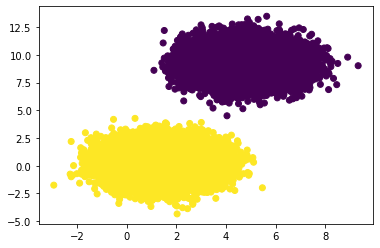

In [311]:
num_samples = 50000
# centers 2 classes
features, labels = datasets.make_blobs(n_samples=num_samples, centers=2, n_features=2, center_box=(0,10))
labels = np.expand_dims(labels.astype(np.float), 1)
print(features.shape, labels.shape)
plt.scatter(features[:, 0], features[:, 1], c = labels[:,0])
plt.show()

## Defining our model (Perceptron)

In [312]:
w = tf.Variable(tf.random.uniform(shape=(2, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))
# show initial weights
print(w.numpy())

[[0.15954435]
 [0.7942238 ]]


## Lest plot our initial model


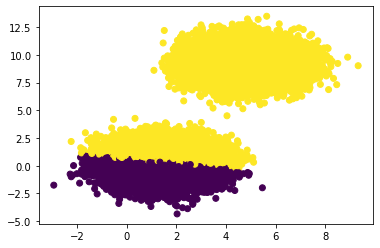

In [315]:
features = tf.convert_to_tensor(features, dtype=tf.float32)
predictions = tf.matmul(features, w) + b
plt.scatter(features[:, 0], features[:, 1], c = predictions[:,0] > 0.5)
plt.show()

## Compute the lost cost

In [316]:
tf.reduce_mean(tf.square(labels - predictions)).numpy()

33.52353

## Training the model

In [317]:
LEARNING_RATE = 0.01

def score_function(features):
    return tf.matmul(features, w) + b

def loss_function(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

# minimize the loss function
def learn(x, y):
    with tf.GradientTape() as tape:
        # Transform data and compute the loss
        predictions = score_function(x)
        loss = loss_function(y, predictions)
        # Compute the derivative/gradients respect to the parameters
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
    # Update the parameters and return loss
    w.assign_sub(LEARNING_RATE * dloss_dw)
    b.assign_sub(LEARNING_RATE * dloss_db)
    return loss


dataset = tf.data.Dataset.from_tensor_slices((features, tf.cast(labels, dtype=tf.float32)))
dataset = dataset.shuffle(buffer_size=1024).batch(256)
# Minimize the loss function
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
        loss = learn(x, y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))



Epoch 0: last batch loss = 0.0528
Epoch 1: last batch loss = 0.0200
Epoch 2: last batch loss = 0.0102
Epoch 3: last batch loss = 0.0116
Epoch 4: last batch loss = 0.0141
Epoch 5: last batch loss = 0.0107
Epoch 6: last batch loss = 0.0113
Epoch 7: last batch loss = 0.0109
Epoch 8: last batch loss = 0.0092
Epoch 9: last batch loss = 0.0108
Epoch 10: last batch loss = 0.0117
Epoch 11: last batch loss = 0.0094
Epoch 12: last batch loss = 0.0087
Epoch 13: last batch loss = 0.0109
Epoch 14: last batch loss = 0.0130
Epoch 15: last batch loss = 0.0088
Epoch 16: last batch loss = 0.0108
Epoch 17: last batch loss = 0.0098
Epoch 18: last batch loss = 0.0119
Epoch 19: last batch loss = 0.0093


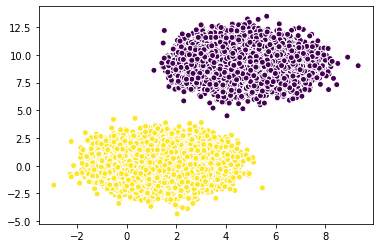

In [318]:
import numpy as np
predictions = score_function(features)
plt.scatter(features[:, 0], features[:, 1], c = predictions[:,0] > 0.5, edgecolor='w')
plt.show()

# Plot decision boundary

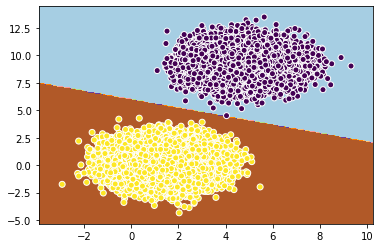

In [319]:
X = features.numpy()
# get area boundaries
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten grid for predictions
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# stack flatten results to create x1,x2 pairs
grid = np.hstack((r1,r2))
# make predictions for the grid
grid_tensor = tf.convert_to_tensor(grid, dtype=tf.float32)
yhat = score_function(grid_tensor).numpy()
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
zz[zz > 0.5] = 1
zz[zz <= 0.5] = 0
predictions = score_function(features)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(features[:, 0], features[:, 1], c = predictions[:,0] > 0.5, edgecolor='w')
plt.show()
